In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df_unido = pd.read_excel("/content/df_unido_def_2.xlsx")

In [3]:
df_unido.head()

,FAC_NO,YEAR,FAC_NO_YEAR,FACILITY_NAME,FAC_STR_ADDR,FAC_CITY,FAC_ZIP,FAC_OPERATED_THIS_YR,TRAUMA_CTR,TEACH_HOSP,...,a_racegrp_asian,a_racegrp_black,a_racegrp_multirace,a_racegrp_nhpi,a_racegrp_white,a_eth_Hispanic,a_eth_NonHispanic,a_DX_Residual,dx_Factors_Influencing_Health_St,a_dx_Factors_Influencing_Health_
0,106010735,2012,1.060107e+08,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,Yes,Non-Trauma Center,No,...,0,0,0,0,0,0,0,0,0,0
1,106010735,2013,1.060107e+08,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,Yes,Non-Trauma Center,No,...,0,0,0,0,0,0,0,0,0,0
2,106010735,2014,1.060107e+08,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,Yes,Non-Trauma Center,No,...,0,0,0,0,0,0,0,0,0,0
3,106010735,2015,1.060107e+08,ALAMEDA HOSPITAL,2070 CLINTON AVE,ALAMEDA,94501,Yes,Non-Trauma Center,No,...,0,0,0,0,0,0,0,0,0,0
4,106010735,2016,1.060107e+08,ALAMEDA HOSPITAL,2070 CLINTON AVE,ALAMEDA,94501,Yes,Non-Trauma Center,No,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_unido.shape

(3596, 427)

In [5]:
# Obtener el nombre de la variables con caracteres
variables_no_numericas = df_unido.select_dtypes(exclude=['number']).columns
print(variables_no_numericas)

Index(['FACILITY_NAME', 'FAC_STR_ADDR', 'FAC_CITY', 'FAC_ZIP',
       'FAC_OPERATED_THIS_YR', 'TRAUMA_CTR', 'TEACH_HOSP', 'COUNTY',
       'FACILITY_LEVEL', 'LIC_CAT', 'LICEE_TOC', 'PRIN_SERVICE_TYPE',
       'SHORT_DOYLE_SERVICES_OFFERED', 'INPATIENT_HOSPICE_PROG_OFFERED',
       'BED_CLASS_GEN_ACUTE_CARE_SERVICE', 'BED_CLASS_SN_HOSPICE_SERVICE',
       'BED_CLASS_IC_HOSPICE_SERVICE',
       'INPATIENT_PALLIATIVE_CARE_PROG_OFFERED',
       'OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED', 'LIC_ED_LEV_BEGIN',
       'LIC_ED_LEV_END', 'AVAIL_SERVICES_ANESTHESIOLOGIST_24HR',
       'AVAIL_SERVICES_ANESTHESIOLOGIST_ON_CALL', 'AVAIL_SERVICES_LAB_24HR',
       'AVAIL_SERVICES_LAB_ON_CALL', 'AVAIL_SERVICES_OPER_RM_24HR',
       'AVAIL_SERVICES_OPER_RM_ON_CALL', 'AVAIL_SERVICES_PHARMACIST_24HR',
       'AVAIL_SERVICES_PHARMACIST_ON_CALL', 'AVAIL_SERVICES_PHYSICIAN_24HR',
       'AVAIL_SERVICES_PHYSICIAN_ON_CALL',
       'AVAIL_SERVICES_PSYCHIATRIC_ER_24HR',
       'AVAIL_SERVICES_PSYCHIATRIC_ER_ON_C

In [6]:
# Mostrar columnas no numericas y sus valores
for columna in variables_no_numericas:
    print(f"Valores únicos en la columna '{columna}':")
    print(df_unido[columna].unique())
    print()

Valores únicos en la columna 'FACILITY_NAME':
['ALAMEDA HOSPITAL' 'ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CAMPUS'
 "CHILDREN'S HOSPITAL AT MISSION"
 "UCSF BENIOFF CHILDREN'S HOSPITAL OAKLAND" 'HIGHLAND HOSPITAL'
 'ALTA BATES SUMMIT MED CTR-SUMMIT CAMPUS-HAWTHORNE'
 'ALTA BATES SUMMIT MEDICAL CENTER' 'ST. ROSE HOSPITAL'
 'WASHINGTON HOSPITAL - FREMONT' 'STANFORD HEALTH CARE - VALLEYCARE'
 'STANFORD HEALTH CARE' 'EDEN MEDICAL CENTER' 'SUTTER AMADOR HOSPITAL'
 'ORCHARD HOSPITAL' 'OROVILLE HOSPITAL' 'ENLOE MEDICAL CENTER- ESPLANADE'
 'MARK TWAIN MEDICAL CENTER' 'COLUSA MEDICAL CENTER'
 'CONTRA COSTA REGIONAL MEDICAL CENTER' 'SUTTER DELTA MEDICAL CENTER'
 'JOHN MUIR MEDICAL CENTER-WALNUT CREEK CAMPUS'
 'KAISER FOUNDATION HOSPITAL - WALNUT CREEK'
 'JOHN MUIR MEDICAL CENTER-CONCORD CAMPUS'
 'SAN RAMON REGIONAL MEDICAL CENTER'
 'KAISER FOUNDATION HOSPITAL - ANTIOCH' 'SUTTER COAST HOSPITAL'
 'BARTON MEMORIAL HOSPITAL' 'MARSHALL MEDICAL CENTER'
 'CLOVIS COMMUNITY MEDICAL CENTER' 'COALINGA R

In [7]:
# Eliminar columnas no numéricas
drop_columns = ['FACILITY_NAME','FAC_STR_ADDR', 'FAC_CITY', 'FAC_OPERATED_THIS_YR',
       'COUNTY', 'FACILITY_LEVEL', 'LIC_CAT', 'LICEE_TOC']
df = df_unido.drop(columns=drop_columns)

In [8]:
# Reemplazar el string '0' por 'No'
df['BED_CLASS_GEN_ACUTE_CARE_SERVICE'] = df['BED_CLASS_GEN_ACUTE_CARE_SERVICE'].replace('0', 'No')
df['BED_CLASS_SN_HOSPICE_SERVICE'] = df['BED_CLASS_SN_HOSPICE_SERVICE'].replace('0', 'No')
df['INPATIENT_PALLIATIVE_CARE_PROG_OFFERED'] = df['INPATIENT_PALLIATIVE_CARE_PROG_OFFERED'].replace('0', 'No')
df['OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED'] = df['OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED'].replace('0', 'No')
df['LIC_ED_LEV_BEGIN'] = df['LIC_ED_LEV_BEGIN'].replace('0', 'No')

In [9]:
variables_cambiadas = ['BED_CLASS_GEN_ACUTE_CARE_SERVICE', 'BED_CLASS_SN_HOSPICE_SERVICE',
                       'INPATIENT_PALLIATIVE_CARE_PROG_OFFERED', 'OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED',
                       'LIC_ED_LEV_BEGIN']

for columna in variables_cambiadas:
    print(f"Valores únicos en la columna '{columna}':")
    print(df[columna].unique())
    print()

Valores únicos en la columna 'BED_CLASS_GEN_ACUTE_CARE_SERVICE':
['No' 'Yes']

Valores únicos en la columna 'BED_CLASS_SN_HOSPICE_SERVICE':
['No' 'Yes']

Valores únicos en la columna 'INPATIENT_PALLIATIVE_CARE_PROG_OFFERED':
['No' 'Yes']

Valores únicos en la columna 'OUTPATIENT_PALLIATIVE_CARE_SERV_OFFERED':
['No' 'Yes']

Valores únicos en la columna 'LIC_ED_LEV_BEGIN':
['Basic' 'Standby' 'No' 'Comprehensive']



In [10]:
# Verificar los valores únicos y asociar valores numéricos a otras columnas categóricas
for column in df.select_dtypes(exclude=['number']).columns:
    unique_values = df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)
    print(f"Mapeo de valores para '{column}': {mapping}")

Mapeo de valores para 'FAC_ZIP': {'94501': 0, '94705': 1, '94609': 2, '94602': 3, '94545': 4, '94538': 5, '94588': 6, '94546': 7, '95642': 8, '95948': 9, '95966': 10, '95926': 11, '95249': 12, '95932': 13, '94553': 14, '94509': 15, '94598': 16, '94596-5300': 17, '94520': 18, '94583': 19, '94531': 20, '95531': 21, '96150': 22, '95667': 23, '93612': 24, '93611': 25, '93210': 26, '93721': 27, '93654': 28, '93720': 29, '95988': 30, '95521': 31, '95542': 32, '95540': 33, '95501': 34, '92243': 35, '92227': 36, '93514': 37, '93545': 38, '93215': 39, '93301': 40, '93306': 41, '93240': 42, '93555': 43, '93308': 44, '93230': 45, '95422': 46, '95453': 47, '96130': 48, '91801': 49, '93534': 50, '90704': 51, '90801': 52, '90813': 53, '90640': 54, '90231': 55, '90232': 56, '90015': 57, '90301': 58, '90027': 59, '90255': 60, '90023': 61, '91776': 62, '90712': 63, '90241': 64, '91436': 65, '91741': 66, '91754': 67, '91206': 68, '91733': 69, '91345': 70, '90017': 71, '91105': 72, '91723': 73, '90505-50

In [11]:
tamaño_test = 0.2
semilla = 42

In [12]:
# Definimos las X (var ind) y la Y (var dep)
X = df.drop('ER_TRAFFIC_TOT', axis=1)
y = df['ER_TRAFFIC_TOT']

In [13]:
# Separar en conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tamaño_test, random_state=semilla)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (2876, 418)
Forma de X_test: (720, 418)
Forma de y_train: (2876,)
Forma de y_test: (720,)


In [14]:
import re

# Corrección en los nombres de las columnas
X_train.columns = [re.sub(r'[^\w]+', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'[^\w]+', '_', col) for col in X_test.columns]

# Creación del modelo de regresión
lgbm = lgb.LGBMRegressor()

# Entrenamiento del modelo
lgbm_fit = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60164
[LightGBM] [Info] Number of data points in the train set: 2876, number of used features: 401
[LightGBM] [Info] Start training from score 42353.880389


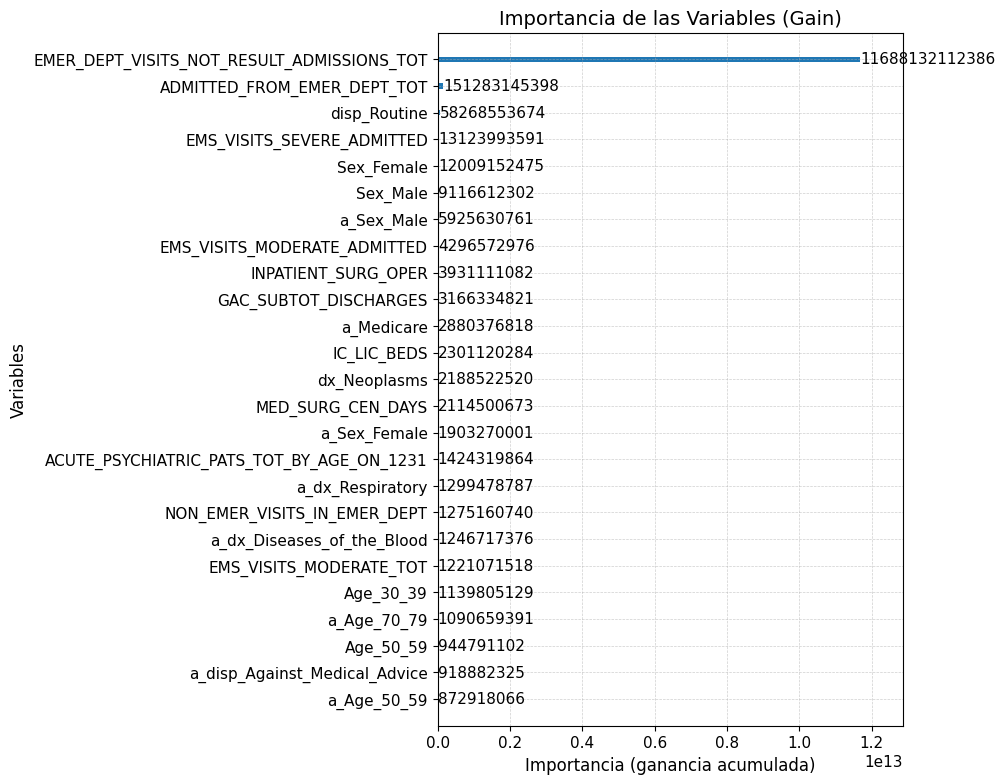

In [15]:
# Gráfico de importancia
plt.rcParams.update({ 'font.size': 11, 'axes.titlesize': 14, 'axes.labelsize': 12})
fig, ax = plt.subplots(figsize=(6, 9))

lgb.plot_importance(
    lgbm_fit,
    ax=ax,
    max_num_features=25,
    importance_type='gain',
    title='Importancia de las Variables (Gain)',
    xlabel='Importancia (ganancia acumulada)',
    ylabel='Variables',
    precision=0 )

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.show()


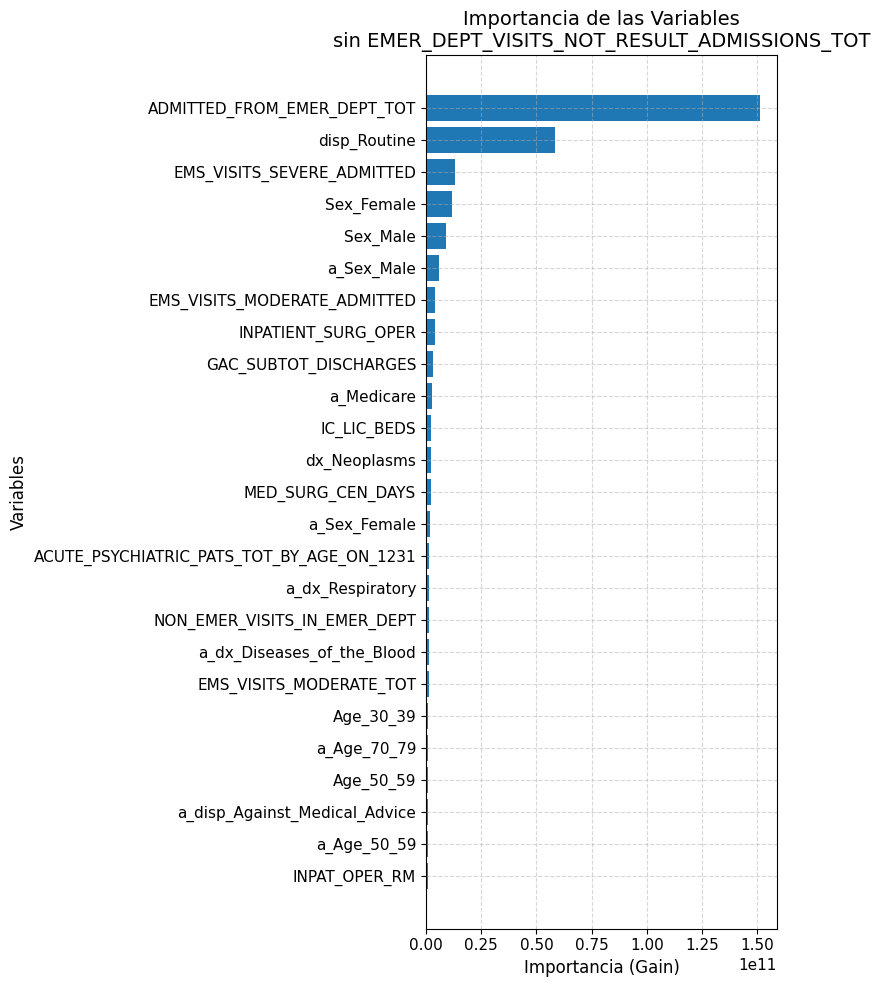

In [16]:
# Obtener importancias de tipo "gain"
importancias = lgbm_fit.booster_.feature_importance(importance_type='gain')
nombres = lgbm_fit.booster_.feature_name()
df_importancias = pd.DataFrame({'Feature': nombres, 'Gain': importancias})

df_importancias = df_importancias.sort_values(by='Gain', ascending=False)
df_sin_top1 = df_importancias.iloc[1:26]

plt.figure(figsize=(8, 10))
plt.barh(df_sin_top1['Feature'], df_sin_top1['Gain'])
plt.xlabel('Importancia (Gain)')
plt.ylabel('Variables')
plt.title('Importancia de las Variables\nsin EMER_DEPT_VISITS_NOT_RESULT_ADMISSIONS_TOT')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [17]:
# Obtener los valores de la predicción
y_train_pred = lgbm_fit.predict(X_train)
y_test_pred = lgbm_fit.predict(X_test)

# y_train_pred_proba = lgbm_fit.predict_proba(X_train)[:, 1]
# y_test_pred_proba = lgbm_fit.predict_proba(X_test)[:, 1]

In [18]:
y_train_pred

array([81546.25248197, 69614.62922821,    90.31426779, ...,
       23354.77814523, 52272.12046114, 58673.87559081])

In [19]:
y_test_pred

array([ 4.41604173e+04,  2.74460759e+04,  1.19684774e+04,  1.07521960e+05,
        4.42976355e+04,  2.12198147e+04,  1.46850730e+04,  2.94472153e+04,
        1.02308746e+04,  1.75588552e+03,  5.57533109e+04,  3.01530397e+04,
        8.58032441e+04,  4.08531595e+03,  7.50528580e+04,  7.56324282e+03,
        6.76278459e+04,  1.34176004e+04,  8.96717755e+04,  8.77126430e+03,
        4.55180134e+04,  6.91606398e+04,  3.85361095e+04,  6.79907813e+03,
        2.56200574e+04,  4.93398208e+04,  3.44842086e+04,  3.24946841e+04,
        4.93193489e+04,  3.55738448e+04,  6.26843440e+04,  8.59991393e+03,
        9.04065191e+03,  7.31651960e+04,  1.10782073e+04,  3.10539270e+04,
       -2.64804539e+02,  4.52315136e+04,  4.73613389e+04,  9.53655372e+03,
        2.27198933e+04,  2.92229935e+04,  2.85911619e+04,  9.02971900e+04,
        7.22417691e+03,  6.47814472e+03,  4.73227187e+03,  4.13321026e+04,
        5.28014671e+04,  2.52366049e+04,  4.48920965e+04,  6.59859243e+04,
        1.19324734e+05,  

In [29]:
# Entrenar el modelo final 1
best_params = {
    'learning_rate': 0.011,
    'num_leaves': 1608,
    'max_depth': 42,
    'min_data_in_leaf': 14,
    'feature_fraction': 0.971,
    'bagging_fraction': 0.752,
    'bagging_freq': 7,
    'lambda_l1': 0.521,
    'lambda_l2': 0.007
}
final_model_1 = lgb.LGBMRegressor(**best_params, n_estimators=1000)
final_model_1.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.971
[LightGBM] [Warning] lambda_l2 is set=0.007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007
[LightGBM] [Warning] lambda_l1 is set=0.521, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.521
[LightGBM] [Warning] bagging_fraction is set=0.752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.752
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.971
[LightGBM] [Warning] lambda_l2 is set=0.007, reg_lambda=

LGBMRegressor(bagging_fraction=0.752, bagging_freq=7, feature_fraction=0.971,
              lambda_l1=0.521, lambda_l2=0.007, learning_rate=0.011,
              max_depth=42, min_data_in_leaf=14, n_estimators=1000,
              num_leaves=1608)

In [28]:
# Entrenar el modelo final 2
best_params_2 = {
    'learning_rate': 0.02,
    'num_leaves': 512,
    'max_depth': 30,
    'min_data_in_leaf': 25,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 6,
    'lambda_l1': 0.2,
    'lambda_l2': 0.01
}

final_model_2 = lgb.LGBMRegressor(**best_params_2, n_estimators=1000)
final_model_2.fit(X_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored

LGBMRegressor(bagging_fraction=0.7, bagging_freq=6, feature_fraction=0.9,
              lambda_l1=0.2, lambda_l2=0.01, learning_rate=0.02, max_depth=30,
              min_data_in_leaf=25, n_estimators=1000, num_leaves=512)

In [30]:
# Entrenar el modelo final 3
best_params_3 = {
    'learning_rate': 0.05,
    'num_leaves': 400,
    'max_depth': 25,
    'min_data_in_leaf': 40,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.6,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.005
}

final_model_3 = lgb.LGBMRegressor(**best_params_3, n_estimators=1000)
final_model_3.fit(X_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=0.005, reg_lambda=0.0 will be igno

LGBMRegressor(bagging_fraction=0.6, bagging_freq=5, feature_fraction=0.8,
              lambda_l1=0.1, lambda_l2=0.005, learning_rate=0.05, max_depth=25,
              min_data_in_leaf=40, n_estimators=1000, num_leaves=400)

In [32]:
modelos = {
    "Modelo 1": final_model_1,
    "Modelo 2": final_model_2,
    "Modelo 3": final_model_3
}

# Evaluación
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

    # Validación cruzada
    cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    resultados.append({
        "Modelo": nombre,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "Adj R2": adj_r2,
        "CV R2 mean": cv_mean,
        "CV R2 std": cv_std
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [26]:
# Predicciones
y_pred = final_model.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]  # Número de observaciones
p = X_test.shape[1]  # Número de predictores (features)
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Mostrar todas las métricas
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.4f}')
print(f'Adjusted R2: {adj_r2:.4f}')


[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.971
[LightGBM] [Warning] lambda_l2 is set=0.007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007
[LightGBM] [Warning] lambda_l1 is set=0.521, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.521
[LightGBM] [Warning] bagging_fraction is set=0.752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.752
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
RMSE: 703.37
MAE: 395.97
R2: 0.9993
Adjusted R2: 0.9983


In [27]:
from sklearn.model_selection import cross_val_score

# Validación cruzada (5 folds)
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='r2')

# Resultados
print(f'\nCross-Validated R² (mean): {cv_scores.mean():.4f}')
print(f'Cross-Validated R² (std): {cv_scores.std():.4f}')


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [34]:
# Modelo definitivo = Modelo 1
y_pred = final_model_1.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.971
[LightGBM] [Warning] lambda_l2 is set=0.007, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007
[LightGBM] [Warning] lambda_l1 is set=0.521, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.521
[LightGBM] [Warning] bagging_fraction is set=0.752, subsample=1.0 will be ignored. Current value: bagging_fraction=0.752
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


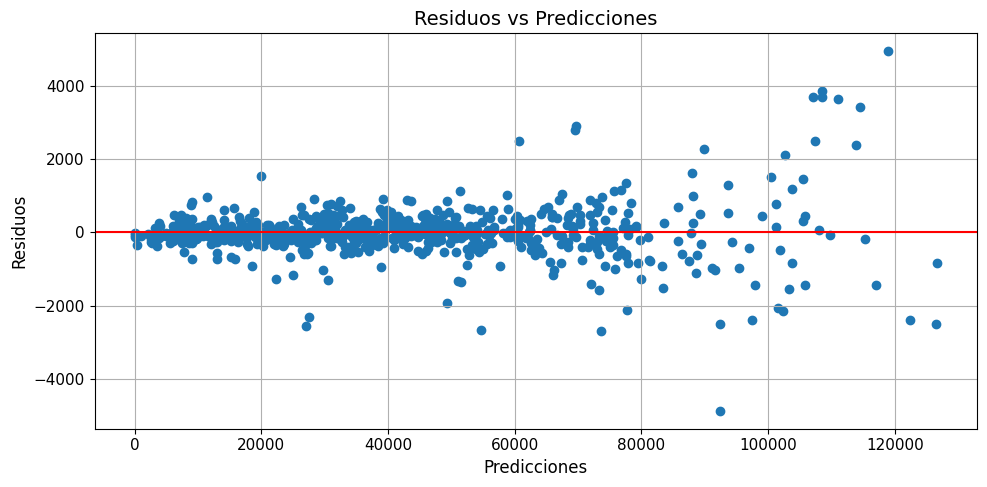

In [39]:
# Cálculo de residuos
residuos = y_test - y_pred

# -------- Gráfico 1: Residuos vs Predicciones --------
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='-')
plt.title("Residuos vs Predicciones", fontsize=14)
plt.xlabel("Predicciones", fontsize=12)
plt.ylabel("Residuos", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


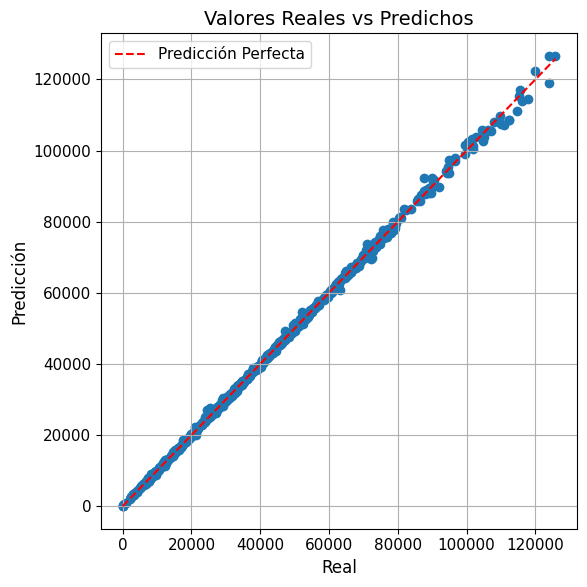

In [40]:

# -------- Gráfico 2: Valores Reales vs Predichos --------
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Predicción Perfecta')
plt.title("Valores Reales vs Predichos", fontsize=14)
plt.xlabel("Real", fontsize=12)
plt.ylabel("Predicción", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Extraemos los valores reales de 2022 y 2023
real_2022 = df[df['YEAR'] == 2022][['FAC_NO', 'ER_TRAFFIC_TOT']].rename(columns={'ER_TRAFFIC_TOT': 'REAL_2022'})
real_2023 = df[df['YEAR'] == 2023][['FAC_NO', 'ER_TRAFFIC_TOT']].rename(columns={'ER_TRAFFIC_TOT': 'REAL_2023'})

# Extraemos el FAC_NO del conjunto de test y añadimos la predicción
X_test_with_preds = X_test.copy()
X_test_with_preds['PREDICCION_2024'] = y_pred
X_test_with_preds.head()


,FAC_NO,YEAR,FAC_NO_YEAR,FAC_ZIP,TRAUMA_CTR,TEACH_HOSP,PRIN_SERVICE_TYPE,MED_SURG_LIC_BEDS,MED_SURG_LIC_BED_DAYS,MED_SURG_DISCHARGES,...,a_racegrp_black,a_racegrp_multirace,a_racegrp_nhpi,a_racegrp_white,a_eth_Hispanic,a_eth_NonHispanic,a_DX_Residual,dx_Factors_Influencing_Health_St,a_dx_Factors_Influencing_Health_,PREDICCION_2024
3069,106430763,2013,1.064308e+08,250,0,0,0,180,65700,9424,...,0,0,0,0,0,0,0,0,0,43593.306199
1255,106190756,2021,1.061908e+08,96,0,0,0,196,71540,8592,...,498,209,0,4292,797,5426,0,550,28,27057.910868
3246,106474007,2022,1.064740e+08,263,4,0,0,20,7300,789,...,0,0,0,799,38,867,0,224,0,12017.833465
1061,106190525,2019,1.061905e+08,84,6,1,0,309,112785,20846,...,3036,432,267,7626,5238,10641,37,0,0,107421.452167
1717,106301098,2015,1.063011e+08,140,0,0,0,153,55845,8727,...,0,0,0,0,0,0,0,0,0,43207.100305


In [37]:
# Ahora hacemos un promedio (o sumamos si quieres), pero como dijiste que es un único valor por FAC_NO, agrupamos por FAC_NO
pred_df = X_test_with_preds.groupby('FAC_NO')['PREDICCION_2024'].mean().reset_index()

# Unimos todo en una tabla final
tabla_final = real_2022.merge(real_2023, on='FAC_NO', how='outer').merge(pred_df, on='FAC_NO', how='outer')

# Eliminamos las filas que tengan valores nulos en alguna columna
tabla_final = tabla_final.dropna()

# Sustituir FAN_NO por FAC_NAME
hospitales_nombres = df_unido[['FAC_NO', 'FACILITY_NAME']].drop_duplicates()
tabla_final_con_nombre = tabla_final.merge(hospitales_nombres, on='FAC_NO', how='left')


# Tabla final
tabla_final_con_nombre = tabla_final_con_nombre[['FACILITY_NAME', 'REAL_2022', 'REAL_2023', 'PREDICCION_2024']]
tabla_final_con_nombre['PREDICCION_2024'] = tabla_final_con_nombre['PREDICCION_2024'].round(2)
tabla_final_con_nombre

,FACILITY_NAME,REAL_2022,REAL_2023,PREDICCION_2024
0,ALAMEDA HOSPITAL,16079,17654,16112.85
1,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,34984,36972,48046.47
2,CHILDREN'S HOSPITAL AT MISSION,40681,42170,40130.54
3,UCSF BENIOFF CHILDREN'S HOSPITAL OAKLAND,40681,42170,40130.54
4,ALAMEDA HOSPITAL,49229,49647,49020.09
...,...,...,...,...
311,ADVENTIST HEALTH SIMI VALLEY,39836,44934,36950.51
312,ST. JOHNS REGIONAL MEDICAL CENTER,54272,56657,45535.26
313,WOODLAND MEMORIAL HOSPITAL,17594,29711,18514.68
314,SUTTER DAVIS HOSPITAL,32195,34797,27698.70


In [38]:
tabla_final_con_nombre.to_excel('tabla_predicciones.xlsx', index=False)